In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv("Imdb - data_imdb.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [2]:
df.info() #checking for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
# Check the distribution of sentiment labels
sentiment_counts = df["sentiment"].value_counts(normalize=True) * 100
sentiment_counts


sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64

In [5]:
# Calculate the length of each review
df["review_length"] = df["review"].apply(len)

# Get summary statistics for review lengths
review_length_stats = df["review_length"].describe()
review_length_stats


count    50000.000000
mean      1309.367720
std        989.759532
min          7.000000
25%        699.000000
50%        970.000000
75%       1590.000000
max      13704.000000
Name: review_length, dtype: float64

In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

# Function for text preprocessing
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"<br\s*/?>", " ", text)  # Remove HTML tags
    text = re.sub(r"[^a-z\s]", "", text)  # Remove punctuation and special characters
    words = word_tokenize(text)  # Tokenization
    words = [word for word in words if word not in stop_words]  # Remove stopwords
    return " ".join(words)

df["cleaned_review"] = df["review"].apply(preprocess_text)

df[["review", "cleaned_review"]].head()


,review,cleaned_review
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching oz episode yo...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


In [7]:
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

# Initializing lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Function for lemmatization
def lemmatize_text(text):
    words = word_tokenize(text)
    return " ".join([lemmatizer.lemmatize(word) for word in words])

# Function for stemming
def stem_text(text):
    words = word_tokenize(text)
    return " ".join([stemmer.stem(word) for word in words])

df['lemmatized_review'] = df['cleaned_review'].apply(lemmatize_text)
df['stemmed_review'] = df['cleaned_review'].apply(stem_text)

df[['cleaned_review', 'lemmatized_review', 'stemmed_review']].head()

,cleaned_review,lemmatized_review,stemmed_review
0,one reviewers mentioned watching oz episode yo...,one reviewer mentioned watching oz episode you...,one review mention watch oz episod youll hook ...
1,wonderful little production filming technique ...,wonderful little production filming technique ...,wonder littl product film techniqu unassum old...
2,thought wonderful way spend time hot summer we...,thought wonderful way spend time hot summer we...,thought wonder way spend time hot summer weeke...
3,basically theres family little boy jake thinks...,basically there family little boy jake think t...,basic there famili littl boy jake think there ...
4,petter matteis love time money visually stunni...,petter matteis love time money visually stunni...,petter mattei love time money visual stun film...


In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initializing vectorizers
bow_vectorizer = CountVectorizer(max_features=5000)  # Bag-of-Words with 5000 common words
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # TF-IDF with 5000 common words

# Fit and transform the text data
bow_features = bow_vectorizer.fit_transform(df['lemmatized_review'])
tfidf_features = tfidf_vectorizer.fit_transform(df['lemmatized_review'])

# Convert to DataFrame
bow_df = pd.DataFrame(bow_features.toarray(), columns=bow_vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("Bag-of-Words Features:")
print(bow_df.head())

print("TF-IDF Features:")
print(tfidf_df.head())


Bag-of-Words Features:
   aaron  abandoned  abc  ability  able  abrupt  absence  absent  absolute  \
0      0          0    0        0     0       0        0       0         0   
1      0          0    0        0     0       0        0       0         0   
2      0          0    0        0     0       0        0       0         0   
3      0          0    0        0     0       0        0       0         0   
4      0          0    0        0     0       0        0       0         0   

   absolutely  ...  youll  young  younger  youngster  youre  youth  youve  \
0           0  ...      1      0        0          0      0      0      0   
1           0  ...      0      0        0          0      0      0      0   
2           0  ...      0      1        0          0      0      0      0   
3           0  ...      0      0        0          0      1      0      0   
4           0  ...      0      0        0          0      0      0      0   

   zero  zombie  zone  
0     0       0     0

In [11]:
# Calculate textual features
df['word_count'] = df['cleaned_review'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['cleaned_review'].apply(lambda x: len(str(x)))
df['avg_word_length'] = df['char_count'] / df['word_count']

df[['cleaned_review', 'word_count', 'char_count', 'avg_word_length']].head()

,cleaned_review,word_count,char_count,avg_word_length
0,one reviewers mentioned watching oz episode yo...,166,1148,6.915663
1,wonderful little production filming technique ...,84,656,7.809524
2,thought wonderful way spend time hot summer we...,85,579,6.811765
3,basically theres family little boy jake thinks...,67,453,6.761194
4,petter matteis love time money visually stunni...,125,855,6.840000


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initializing TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use top 5000 words

# Fit and transform the text data
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_review'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

tfidf_df.head()


,aaron,abandoned,abc,abilities,ability,able,absence,absent,absolute,absolutely,...,youll,young,younger,youre,youth,youve,zero,zombie,zombies,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.059882,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.07892,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.077892,0.0,0.0,0.0,0.230603,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


In [13]:
from gensim.models import Word2Vec

# Tokenize reviews (convert sentences into lists of words)
tokenized_reviews = df['cleaned_review'].apply(lambda x: str(x).split())

# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=2, workers=4)

# Get vector representation for a sample word
word_vector = w2v_model.wv['great']  

# Print vector for 'great'
print(word_vector)


[-1.9592832   2.6516364  -1.6298097   0.05928363  0.96126556 -0.6370519
  0.1012475   1.3932048   1.6303077   1.1619272  -2.1391563   0.42115027
 -1.1914152   0.3458293  -2.886069    0.17401455 -1.7692722   2.0635517
 -0.09426983 -0.08719289 -0.3715041  -1.654465    0.5191114   0.07364132
 -1.1462471   1.8711374  -0.3625121   0.69476193 -0.875556   -0.57548
  1.082132   -1.9489875   1.2920783  -0.25518304 -3.8225832  -0.76177347
  0.47028422 -1.663895   -1.0503212   0.77531993  1.8153389  -0.16881223
  1.1973424  -0.22516213  1.8630922   1.5233172  -1.0751786  -0.339871
 -0.2962786  -1.2233866  -0.07471029  2.196935    1.60985     1.5865406
 -0.28312296 -0.8500609   2.5239792  -0.93870175  2.987831    1.8026572
  1.9559189  -1.6359687   0.21275035  1.3365537  -0.56570774  0.22223467
 -0.69757134  1.6345991   2.0350344  -0.40905416 -1.7552598   0.62097245
 -0.7813788   0.92905533  0.37132686 -0.8169912  -0.56474906  0.037271
 -0.79781944 -0.8316976   0.7316038  -1.047414   -1.8256187  -

In [14]:
# Data Preparation 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF Vectorizer 
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(df['cleaned_review'])

# Target Variable (Convert 'positive' to 1 and 'negative' to 0)
y = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr_model.predict(X_test)

# Evaluate model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")


Logistic Regression Accuracy: 0.8889


In [16]:
from sklearn.naive_bayes import MultinomialNB

# Train Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict on test data
y_pred_nb = nb_model.predict(X_test)

# Evaluate model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naïve Bayes Accuracy: {accuracy_nb:.4f}")


Naïve Bayes Accuracy: 0.8516


In [17]:
from sklearn.svm import SVC

# Reduce dataset size for faster SVM training
X_train_small = X_train[:5000]
y_train_small = y_train[:5000]

# Train SVM Model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_small, y_train_small)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)

# Evaluate model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")


SVM Accuracy: 0.8621


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


Random Forest Accuracy: 0.8513


In [20]:
from sklearn.metrics import classification_report

# Evaluate each model(classification report)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("Naïve Bayes:\n", classification_report(y_test, y_pred_nb))
print("SVM:\n", classification_report(y_test, y_pred_svm))
print("Random Forest:\n", classification_report(y_test, y_pred_rf))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

Naïve Bayes:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

SVM:
               precision    recall  f1-score   support

           0       0.88      0.84      0.86      4961
           1       0.85      0.89      0.87      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.8

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenization
vocab_size = 5000  # Use top 5000 words
max_length = 200  # Maximum review length

tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_review'])

X_sequences = tokenizer.texts_to_sequences(df['cleaned_review'])

X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post')

# Ensure labels are numerical
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

# Split dataset again
from sklearn.model_selection import train_test_split

X_train_pad, X_test_pad, y_train, y_test = train_test_split(X_padded, df['sentiment'], test_size=0.2, random_state=42)


In [24]:
# Evaluate model performance on the test set
loss, accuracy = lstm_model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5020 - loss: 0.6931
Test Accuracy: 0.5037


In [25]:
from sklearn.metrics import classification_report

# Get model predictions
y_pred_probs = lstm_model.predict(X_test_pad)  # Get probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Generate classification report
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      4961
    Positive       0.50      1.00      0.67      5039

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.34     10000



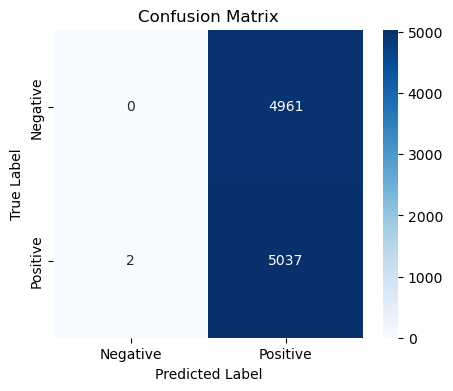

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


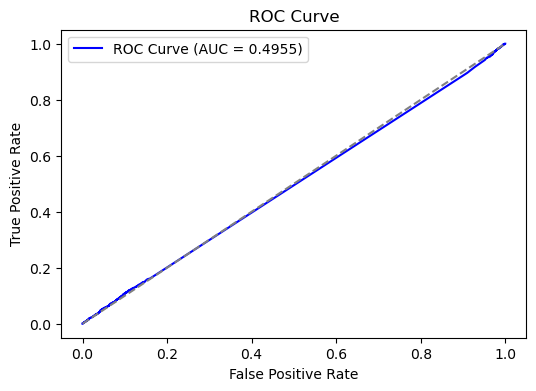

In [27]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


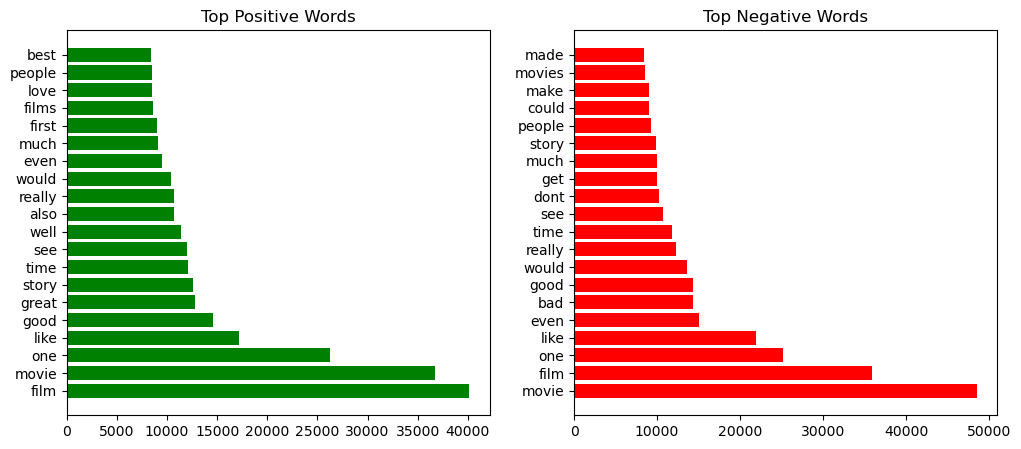

In [28]:
# criteria

from collections import Counter
import matplotlib.pyplot as plt

# Split dataset into positive and negative reviews
positive_reviews = " ".join(df[df['sentiment'] == 1]['cleaned_review'])
negative_reviews = " ".join(df[df['sentiment'] == 0]['cleaned_review'])

# Count word frequencies
positive_words = Counter(positive_reviews.split()).most_common(20)
negative_words = Counter(negative_reviews.split()).most_common(20)

# Plot word frequency
plt.figure(figsize=(12, 5))

# Positive words
plt.subplot(1, 2, 1)
plt.barh([word[0] for word in positive_words], [word[1] for word in positive_words], color='green')
plt.title("Top Positive Words")

# Negative words
plt.subplot(1, 2, 2)
plt.barh([word[0] for word in negative_words], [word[1] for word in negative_words], color='red')
plt.title("Top Negative Words")

plt.show()
